## Importing Libraries


In [1]:
# pip install xgboost

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [3]:
dataset=pd.read_csv("./train.csv")
dataset.head()

,UID,PITCHER_KEY,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,RELEASE_HEIGHT,RELEASE_SIDE,PITCH_TYPE_TRACKED_KEY
0,361,483,92.179588,1976.671631,6.226351,-2.788761,SI
1,362,483,93.352028,2113.584229,6.384256,-2.626077,SI
2,350,864,93.109413,2153.424561,5.912424,-1.954881,FB
3,353,928,93.710999,2457.569092,5.913225,-1.000528,FB
4,359,483,92.901886,1993.830200,6.303658,-2.822147,SI


In [4]:
print(f'Number of rows and columns in dataset {len(dataset)}, {len(dataset.columns)} respectively')

Number of rows and columns in dataset 100000, 7 respectively


## Variable Identification

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UID                     100000 non-null  int64  
 1   PITCHER_KEY             100000 non-null  int64  
 2   RELEASE_SPEED           100000 non-null  float64
 3   SPIN_RATE_ABSOLUTE      100000 non-null  float64
 4   RELEASE_HEIGHT          100000 non-null  float64
 5   RELEASE_SIDE            100000 non-null  float64
 6   PITCH_TYPE_TRACKED_KEY  100000 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 5.3+ MB


Based on the abive output we can say that the first two columns in the dataset are of integer datatype, the next 4 are of float datatype and the last column is object datatype

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,100000.0,49999.500000,28867.657797,0.000000,24999.750000,49999.500000,74999.250000,99999.000000
PITCHER_KEY,100000.0,612.034350,389.421967,0.000000,285.000000,564.000000,915.000000,1453.000000
RELEASE_SPEED,100000.0,88.777251,5.989085,65.036499,84.515245,89.853310,93.600851,102.899002
SPIN_RATE_ABSOLUTE,100000.0,2249.448645,325.712020,0.000000,2087.816284,2265.095825,2438.664917,3599.944824
RELEASE_HEIGHT,100000.0,5.867257,0.524442,1.036694,5.618483,5.907460,6.193550,7.525885
RELEASE_SIDE,100000.0,-0.706419,1.887958,-5.262220,-2.073693,-1.423814,1.219448,5.165480


From the above output, we can see the descriptive statistics summary of the given dataset. 

In [8]:
dataset.isnull().sum()

UID                       0
PITCHER_KEY               0
RELEASE_SPEED             0
SPIN_RATE_ABSOLUTE        0
RELEASE_HEIGHT            0
RELEASE_SIDE              0
PITCH_TYPE_TRACKED_KEY    0
dtype: int64

No null or missing values in the dataset

## Class distribution

<AxesSubplot:xlabel='PITCH_TYPE_TRACKED_KEY', ylabel='count'>

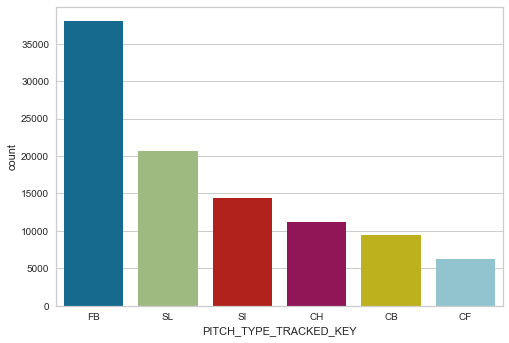

In [9]:
sns.countplot(x='PITCH_TYPE_TRACKED_KEY',data=dataset,order=dataset['PITCH_TYPE_TRACKED_KEY'].value_counts().index)

In [10]:
dataset['PITCH_TYPE_TRACKED_KEY'].value_counts()

FB    38026
SL    20686
SI    14401
CH    11239
CB     9392
CF     6256
Name: PITCH_TYPE_TRACKED_KEY, dtype: int64

We can see there is an imbalance in the dataset. We will balance the dataset by upsampling categories with less records and downsampling categories with larger number of records. 


In [11]:
df_level_FB=dataset[dataset['PITCH_TYPE_TRACKED_KEY']=='FB']
df_level_SL=dataset[dataset['PITCH_TYPE_TRACKED_KEY']=='SL']
df_level_SI=dataset[dataset['PITCH_TYPE_TRACKED_KEY']=='SI']
df_level_CH=dataset[dataset['PITCH_TYPE_TRACKED_KEY']=='CH']
df_level_CB=dataset[dataset['PITCH_TYPE_TRACKED_KEY']=='CB']
df_level_CF=dataset[dataset['PITCH_TYPE_TRACKED_KEY']=='CF']

df_level_FB_new = resample(df_level_FB,
             replace=True,
             n_samples=20000,
             random_state=42)

df_level_SL_new = resample(df_level_SL,
             replace=True,
             n_samples=20000,
             random_state=42)

df_level_SI_new = resample(df_level_SI,
             replace=True,
             n_samples=20000,
             random_state=42)

df_level_CH_new = resample(df_level_CH,
             replace=True,
             n_samples=20000,
             random_state=42)

df_level_CB_new = resample(df_level_CB,
             replace=True,
             n_samples=20000,
             random_state=42)

df_level_CF_new = resample(df_level_CF,
             replace=True,
             n_samples=20000,
             random_state=42)

new_dataset=[df_level_FB_new,df_level_SL_new,df_level_SI_new,df_level_CH_new,df_level_CB_new,df_level_CF_new]
new_dataset=pd.concat(new_dataset)
new_dataset=new_dataset.sample(frac=1).reset_index(drop=True)
new_dataset['PITCH_TYPE_TRACKED_KEY'].value_counts()

SL    20000
CH    20000
CB    20000
CF    20000
FB    20000
SI    20000
Name: PITCH_TYPE_TRACKED_KEY, dtype: int64

Now, we have a balanced dataset. 
We can notice that 'PITCH_TYPE_TRACKED_KEY' is object type. We can consider converting it to numeric datatype to be able to visualize it and use it for modelling. 

In [12]:
le=LabelEncoder()
label = le.fit_transform(new_dataset['PITCH_TYPE_TRACKED_KEY'])
new_dataset["PITCH_TYPE_TRACKED_KEY_Encoded"] = label


data_label_encoded=pd.DataFrame({'PITCH_TYPE_TRACKED_KEY':le.inverse_transform(new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].unique()),
                                 'PITCH_TYPE_TRACKED_KEY_Encoded':new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].unique()})
data_label_encoded

,PITCH_TYPE_TRACKED_KEY,PITCH_TYPE_TRACKED_KEY_Encoded
0,SL,5
1,CH,2
2,CB,0
3,CF,1
4,FB,3
5,SI,4


We can see the defined labels for the 6 classes of 'PITCH_TYPE_TRACKED_KEY'

In [13]:
new_dataset.drop("PITCH_TYPE_TRACKED_KEY", axis=1, inplace=True)
new_dataset.head()

,UID,PITCHER_KEY,RELEASE_SPEED,SPIN_RATE_ABSOLUTE,RELEASE_HEIGHT,RELEASE_SIDE,PITCH_TYPE_TRACKED_KEY_Encoded
0,67725,1375,81.026115,2420.072754,5.956572,-1.999649,5
1,71245,810,83.960724,1452.576660,6.317073,3.374629,2
2,89459,510,75.923187,2800.812012,6.058691,1.483144,0
3,68003,467,85.194031,2236.845703,5.937061,1.603764,2
4,68162,564,84.861031,1516.990845,5.416316,-1.814082,2


<AxesSubplot:xlabel='PITCH_TYPE_TRACKED_KEY_Encoded', ylabel='count'>

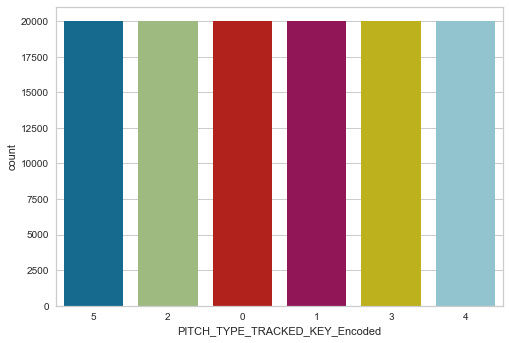

In [14]:
sns.countplot(x='PITCH_TYPE_TRACKED_KEY_Encoded',data=new_dataset,order=new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].value_counts().index)

The data is balanced now

## Univariate analysis of continuous variables

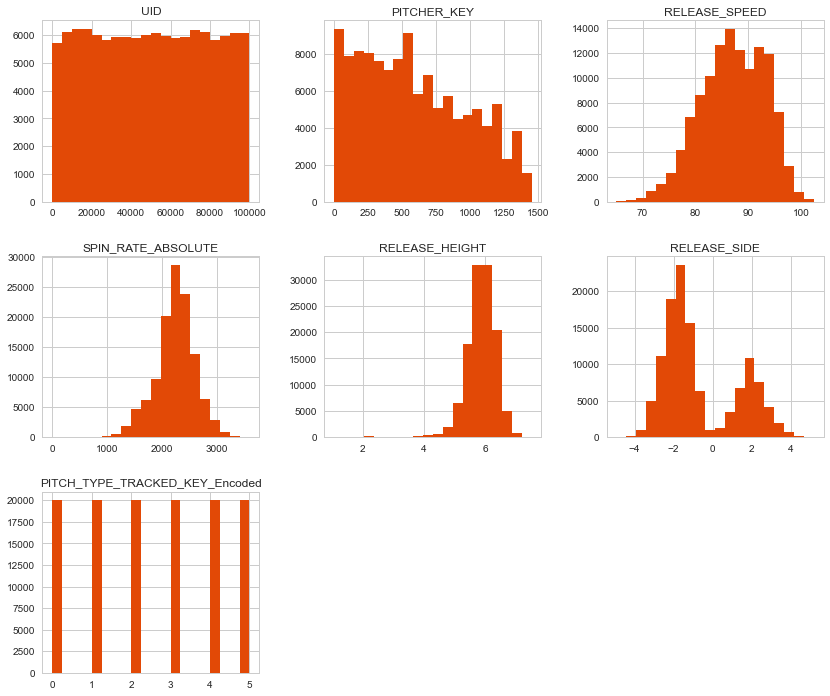

In [15]:
plt.style.use('seaborn-whitegrid')

new_dataset.hist(figsize=(14,12),bins=20, color='#E24906')
plt.show()

Most of the relevant features are almost normally distributed

<AxesSubplot:>

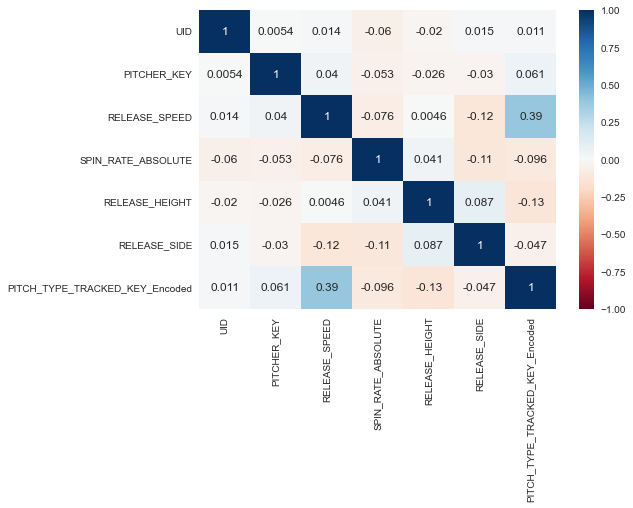

In [16]:
corr = new_dataset.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

Based on the above correlation visualization, we observe a slight correlation between RELEASE_SPEED & the dependent variable

<module 'matplotlib.pyplot' from 'C:\\Users\\akank\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

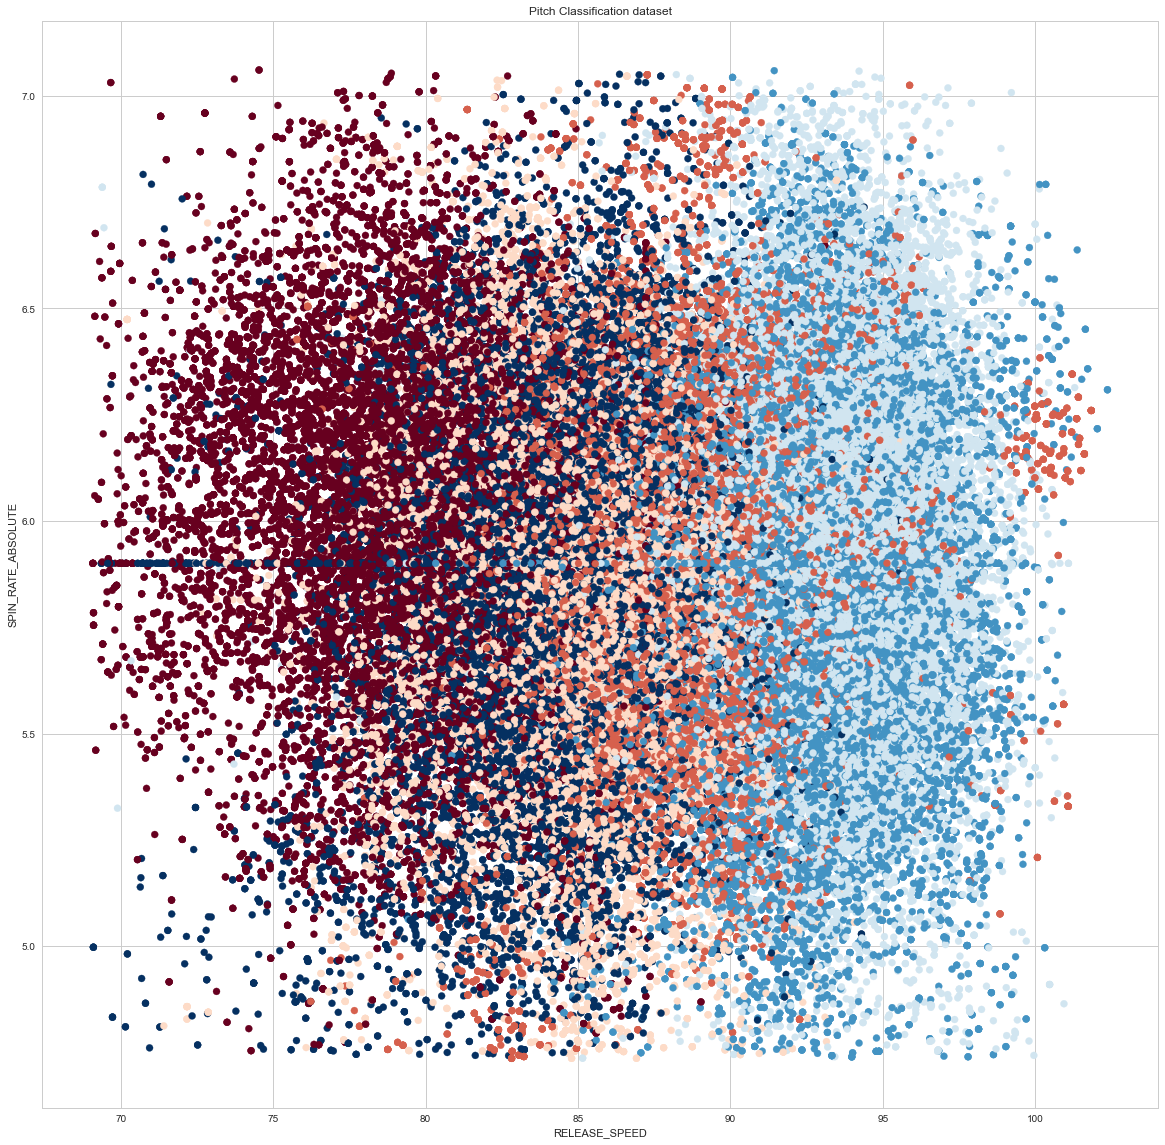

In [47]:
plt.figure(figsize=(20,20))
# plt.scatter(new_dataset.iloc[:, 2].values, new_dataset.iloc[:, 3].values, c=new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].values,cmap='RdBu')
plt.scatter(new_dataset.iloc[:, 2].values, new_dataset.iloc[:, 4].values, c=new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].values,cmap='RdBu')
# plt.scatter(new_dataset.iloc[:, 2].values, new_dataset.iloc[:, 5].values, c=new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].values,cmap='RdBu')
# plt.scatter(new_dataset.iloc[:, 3].values, new_dataset.iloc[:, 4].values, c=new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].values,cmap='RdBu')
# plt.scatter(new_dataset.iloc[:, 5].values, new_dataset.iloc[:, 4].values, c=new_dataset['PITCH_TYPE_TRACKED_KEY_Encoded'].values,cmap='RdBu')
plt.title('Pitch Classification dataset')
plt.xlabel('RELEASE_SPEED')
plt.ylabel("SPIN_RATE_ABSOLUTE")
plt

After trying to visualize the clusters based on different features, we found there is no linear relationship between featires. Due to Non linear nature of relation, we will not use Logistic regression

## Observing Outliers

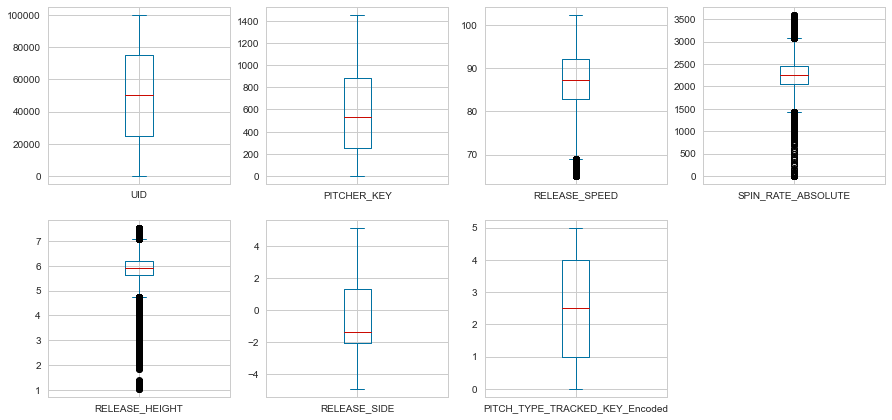

In [18]:
new_dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

'RELEASE_SPEED', 'SPIN_RATE_ABSOLUTE' & 'RELEASE_HEIGHT' have outliers

## Removing Outliers

In [19]:
outliers = ['RELEASE_SPEED', 'SPIN_RATE_ABSOLUTE','RELEASE_HEIGHT' ]
for i in outliers:
    Q1=new_dataset[i].quantile(0.25)
    Q3=new_dataset[i].quantile(0.75)
    IQR=Q3-Q1
    new_dataset.loc[new_dataset[i]>(Q3+1.5*IQR),i]=np.median(new_dataset[i])
    new_dataset.loc[new_dataset[i]<(Q1-1.5*IQR),i]=np.median(new_dataset[i])

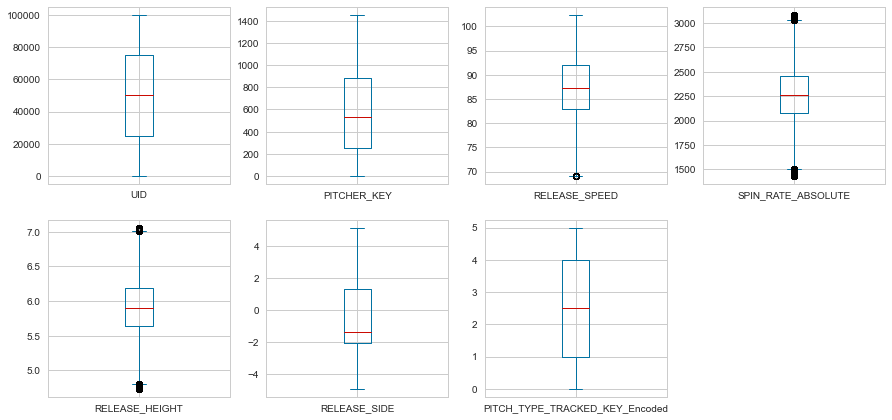

In [20]:
new_dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

array([[<AxesSubplot:title={'center':'UID'}>,
        <AxesSubplot:title={'center':'PITCHER_KEY'}>,
        <AxesSubplot:title={'center':'RELEASE_SPEED'}>],
       [<AxesSubplot:title={'center':'SPIN_RATE_ABSOLUTE'}>,
        <AxesSubplot:title={'center':'RELEASE_HEIGHT'}>,
        <AxesSubplot:title={'center':'RELEASE_SIDE'}>],
       [<AxesSubplot:title={'center':'PITCH_TYPE_TRACKED_KEY_Encoded'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 1440x1440 with 0 Axes>

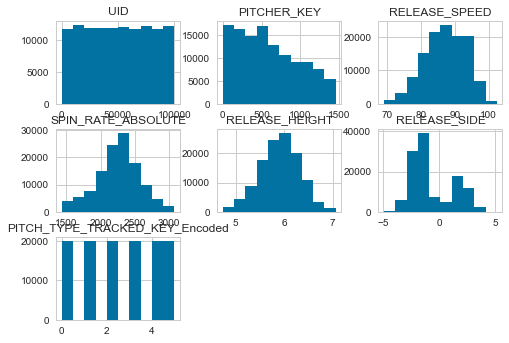

In [22]:
plt.figure(figsize=(20,20))
new_dataset.hist()

In [23]:
new_dataset.describe().loc[['min', 'max']].T

,min,max
UID,0.000000,99997.000000
PITCHER_KEY,0.000000,1453.000000
RELEASE_SPEED,69.079308,102.372543
SPIN_RATE_ABSOLUTE,1431.250000,3083.274658
RELEASE_HEIGHT,4.735712,7.060982
RELEASE_SIDE,-4.933950,5.165480
PITCH_TYPE_TRACKED_KEY_Encoded,0.000000,5.000000


Since SPIN_RATE_ABSOLUTE has large values, to avoid biased results for a feature with higher values, lets do scaling. 
Additionally, we can ignore UID as it is just identifier. 

## Applying Min-Max Scaler

In [24]:
X=new_dataset.iloc[:,1:-1]
y=new_dataset.iloc[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, shuffle=True, random_state=0, stratify=test)


scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True,stratify=y, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


We have scaled the dataset after splitting it into training and test data

In [25]:
X_train

array([[0.55609085, 0.46818801, 0.72009828, 0.39776813, 0.19921223],
       [0.47281487, 0.31808848, 0.7952242 , 0.56800201, 0.31343253],
       [0.24432209, 0.65406568, 0.7155318 , 0.6051547 , 0.14370018],
       ...,
       [0.51823813, 0.24792618, 0.18603297, 0.50087871, 0.20843424],
       [0.11768754, 0.42132668, 0.83551493, 0.3870351 , 0.31131589],
       [0.01995871, 0.72319952, 0.55054101, 0.1272743 , 0.79149109]])

In [26]:
y_train.head()

16152     5
89441     0
90885     1
107357    4
64100     1
Name: PITCH_TYPE_TRACKED_KEY_Encoded, dtype: int32

## Modelling 

For modelling we will use:

1. Random Forest: Create uncorrelated trees and see if they are able to figure out classification
2. XGBOOST: Boosting gradient method
3. Neural Network: For classification of multi-label dataset

## Cross Validation Stratergy

For Cross Validation we will use stratified cross validation, this to make sure that our cross validation data has same percentage of classes in its split. 

We will also look at Learning Curve: It tells us how the model improves with more data and also helps us understand improvement on Cross Validation

## Random Forest

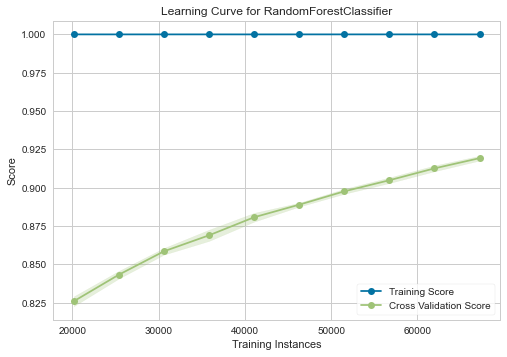

In [27]:
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model_RF = RandomForestClassifier()
visualizer = LearningCurve(
    model_RF, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()   
plt.show()

## Learning curve to evaluate models

Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves.

Reviewing learning curves of models during training can be used to diagnose problems with learning, such as an underfit or overfit model, as well as whether the training and validation datasets are suitably representative.

## Interpretation of Random Forest Learning Curve:

We see that the random forest performance increases on the validation data as we increase the training sample. At 70000 training instances Random Forest reaches its peak preformance and is able to generalize well on validation data.

In [28]:
model_RF.fit(X_train, y_train)
y_predict = model_RF.predict_proba(X_test_sc)
print(y_predict)


[[0.   0.01 0.   0.16 0.83 0.  ]
 [1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.15 0.85 0.  ]
 ...
 [0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.  ]
 [0.19 0.   0.   0.   0.   0.81]]


In [29]:
y_predict = model_RF.predict(X_test_sc)
model_RF.score(X_test_sc,y_test)

0.9336666666666666

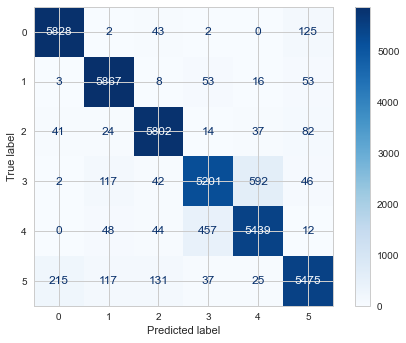

In [30]:

ConfusionMatrixDisplay.from_estimator(
        model_RF,
        X_test_sc,
        y_test,
        cmap=plt.cm.Blues,
    )


## XGBoost Classifier

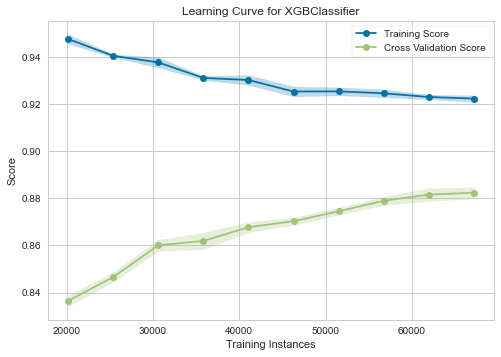

In [32]:
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model_XGB = XGBClassifier(objective="multi:softprob")
visualizer = LearningCurve(
    model_XGB, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()
plt.show()

## Interpretation of XGBOOST Learning Curve:

We see that Xgboost learning curve has a varying performance on the validation data, with increase in the training sample  the validation score increases however the score decreases for training data.

In [33]:
model_XGB.fit(X_train, y_train)
y_predict = model_XGB.predict_proba(X_test)
print(y_predict)


[[1.8546193e-04 2.2213072e-01 1.8584206e-04 7.6274025e-01 1.1455312e-02
  3.3024619e-03]
 [1.8546193e-04 2.2213072e-01 1.8584206e-04 7.6274025e-01 1.1455312e-02
  3.3024619e-03]
 [1.8546193e-04 2.2213072e-01 1.8584206e-04 7.6274025e-01 1.1455312e-02
  3.3024619e-03]
 ...
 [1.8546193e-04 2.2213072e-01 1.8584206e-04 7.6274025e-01 1.1455312e-02
  3.3024619e-03]
 [1.8546193e-04 2.2213072e-01 1.8584206e-04 7.6274025e-01 1.1455312e-02
  3.3024619e-03]
 [1.8546193e-04 2.2213072e-01 1.8584206e-04 7.6274025e-01 1.1455312e-02
  3.3024619e-03]]


In [34]:
y_predict = model_XGB.predict(X_test_sc)
model_XGB.score(X_test_sc,y_test)

0.8870833333333333

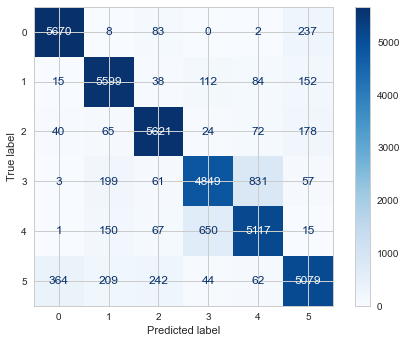

In [35]:
ConfusionMatrixDisplay.from_estimator(
        model_XGB,
        X_test_sc,
        y_test,
        cmap=plt.cm.Blues,
    )

## Neural Network

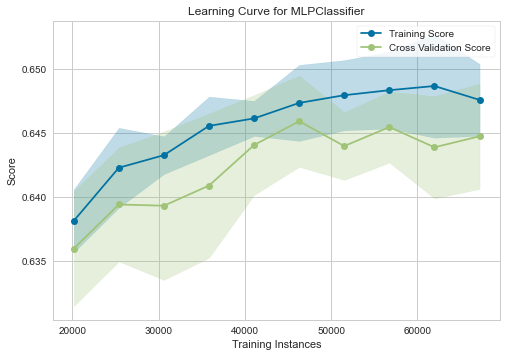

In [46]:
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model_NN = MLPClassifier()
visualizer = LearningCurve(
    model_NN, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()   
plt.show()

## Interpretation of Neural Network Learning Curve:

Neural network's learning curve has an increment in score for both training and validation data. However, the score is pretty low

In [37]:
model_NN.fit(X_train, y_train)
y_predict = model_NN.predict_proba(X_test)
print(y_predict)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [38]:
y_predict = model_NN.predict(X_test_sc)
model_NN.score(X_test_sc,y_test)

0.64575

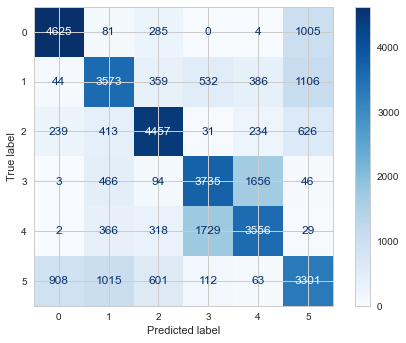

In [39]:
ConfusionMatrixDisplay.from_estimator(
        model_NN,
        X_test_sc,
        y_test,
        cmap=plt.cm.Blues,
    )

### From the learning curves we can see that the RandomForest Model performs well on validation data as the training instances increases. This means that the generalization ablity of Random Forest increases well.

### Additionally, as the dataset was balanced, model score and confusion matrix are good parameters to scale the performance of the various models. Based on the confusion matrix and scores for each models, we can state that Random Forest would be the most suitable to classify the pitch

In [40]:
test_dataset=pd.read_csv('./test.csv')
test=test_dataset.iloc[:,1:6]
test_sc=scaler.transform(test)
test_predict = model_RF.predict_proba(test_sc)
test_predict

array([[0.  , 0.  , 0.36, 0.19, 0.43, 0.02],
       [0.  , 0.  , 0.01, 0.39, 0.58, 0.02],
       [0.  , 0.05, 0.  , 0.74, 0.2 , 0.01],
       ...,
       [0.  , 0.  , 0.  , 0.96, 0.03, 0.01],
       [0.  , 0.  , 0.02, 0.55, 0.42, 0.01],
       [0.  , 0.  , 0.  , 0.9 , 0.1 , 0.  ]])

In [41]:
model_RF.classes_

array([0, 1, 2, 3, 4, 5])

## Feature Importance

In [44]:
pd.DataFrame(model_RF.feature_importances_, index=X_test.columns).sort_values(by=0, ascending=False)

,0
RELEASE_SPEED,0.333323
SPIN_RATE_ABSOLUTE,0.240224
PITCHER_KEY,0.177000
RELEASE_SIDE,0.134998
RELEASE_HEIGHT,0.114455


We see that RELEASE_SPEED and SPIN_RATE_ABSOLUTE are the most important features.

We saw during EDA, the correlation heat map plot indicated that RELEASE_SPEED has positive correlation between different Pitch Key classes

## Prediction on Test dataset

In [45]:

test_predict_CB = test_predict[:, 0]
test_predict_CF = test_predict[:, 1]
test_predict_CH = test_predict[:, 2]
test_predict_FB = test_predict[:, 3]
test_predict_SI = test_predict[:, 4]
test_predict_SL = test_predict[:, 5]

#Assigning values to columns and a new file
predicted = pd.DataFrame() #Creates empty dataframe
predicted["UID"]=test_dataset["UID"]
predicted["CB"] = test_predict_CB
predicted["CF"] = test_predict_CF
predicted["CH"] = test_predict_CH
predicted["FB"] = test_predict_FB
predicted["SI"] = test_predict_SI
predicted["SL"] = test_predict_SL
predicted.to_csv("predicted.csv", index = False)
predicted.head()

,UID,CB,CF,CH,FB,SI,SL
0,5854,0.00,0.00,0.36,0.19,0.43,0.02
1,5790,0.00,0.00,0.01,0.39,0.58,0.02
2,1407,0.00,0.05,0.00,0.74,0.20,0.01
3,1129,0.29,0.11,0.14,0.00,0.01,0.45
4,1980,0.81,0.00,0.00,0.00,0.00,0.19
